# Sentiment Analysis

In [2]:
import pandas as pd

# Try reading the file with 'ISO-8859-1' encoding
df = pd.read_csv('/content/Corona.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataframe and its structure again
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


(   UserName  ScreenName   Location     TweetAt  \
 0      3799       48751     London  16-03-2020   
 1      3800       48752         UK  16-03-2020   
 2      3801       48753  Vagabonds  16-03-2020   
 3      3802       48754        NaN  16-03-2020   
 4      3803       48755        NaN  16-03-2020   
 
                                        OriginalTweet           Sentiment  
 0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
 1  advice Talk to your neighbours family to excha...            Positive  
 2  Coronavirus Australia: Woolworths to give elde...            Positive  
 3  My food stock is not the only one which is emp...            Positive  
 4  Me, ready to go at supermarket during the #COV...  Extremely Negative  ,
 None)

In [3]:
# Analyze the distribution of sentiments in the dataset
sentiment_distribution = df['Sentiment'].value_counts(normalize=True) * 100

sentiment_distribution


Positive              27.752266
Negative              24.095537
Neutral               18.740433
Extremely Positive    16.094468
Extremely Negative    13.317297
Name: Sentiment, dtype: float64

# Exploratory Data Analysis

In [4]:
# Count the number of tweets by location and sentiment
location_sentiment_count = df.groupby(['Location', 'Sentiment']).size().unstack(fill_value=0)

# Add a total tweets column for each location
location_sentiment_count['Total Tweets'] = location_sentiment_count.sum(axis=1)

# Sort locations by total tweets to see the most active ones
location_sentiment_count = location_sentiment_count.sort_values(by='Total Tweets', ascending=False)

# Display the top 20 locations with their sentiment breakdown and total tweets
location_sentiment_count.head(20)


Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive,Total Tweets
Location,,,,,,
London,74,70,134,105,157,540
United States,64,91,107,112,154,528
"London, England",81,74,114,107,144,520
"New York, NY",46,71,83,93,102,395
"Washington, DC",52,68,83,56,114,373
United Kingdom,47,52,86,51,101,337
"Los Angeles, CA",25,52,63,63,78,281
India,25,49,75,52,67,268
UK,33,41,54,45,59,232


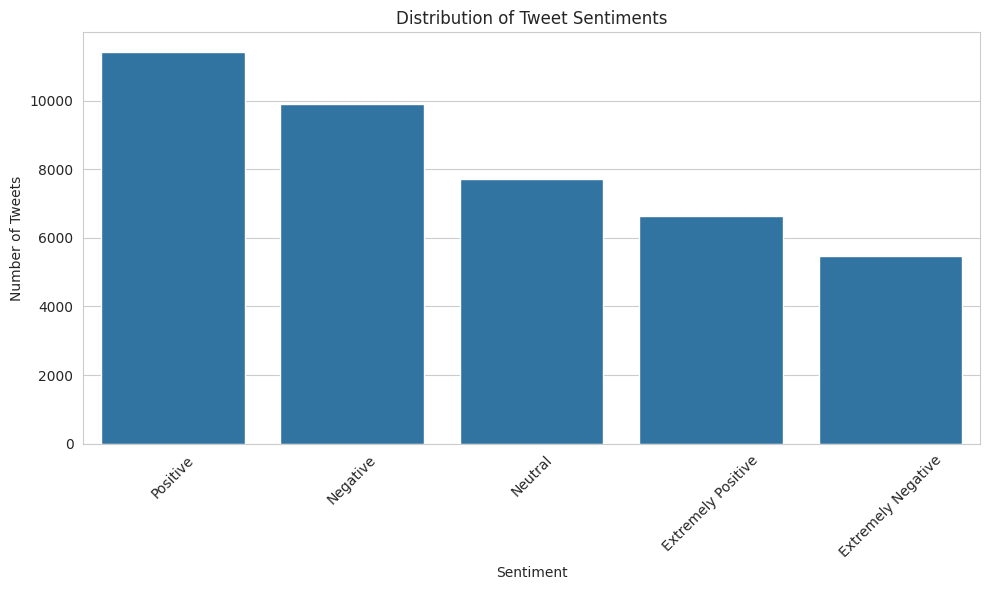

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index)
plt.title('Distribution of Tweet Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Temporal Analysis

we will examine the tweeting patterns over time. Let's convert the TweetAt column to a datetime format and analyze the number of tweets per day along with their sentiment distribution.

 - The dataset shows tweets from April 1st to April 12th, 2020, a crucial early period during the global spread of Covid-19. Here are some key observations:

 - Increasing Tweet Volume: There's a noticeable increase in the total number of tweets over the first few days, peaking on April 17th, 2020, with 1,977 tweets. This suggests growing public engagement and concern as the pandemic's impact became more pronounced.

 - Sentiment Fluctuations: The distribution of sentiments varies significantly day by day. For instance, on April 1st, the most common sentiment was Negative (156), but by April 8th, Positive sentiment tweets (558) were the most numerous. This fluctuation could reflect changing public sentiments in response to new developments, policies, or public health communications.

<ipython-input-6-5f66b500815a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['TweetAt'] = pd.to_datetime(df['TweetAt'], errors='coerce')


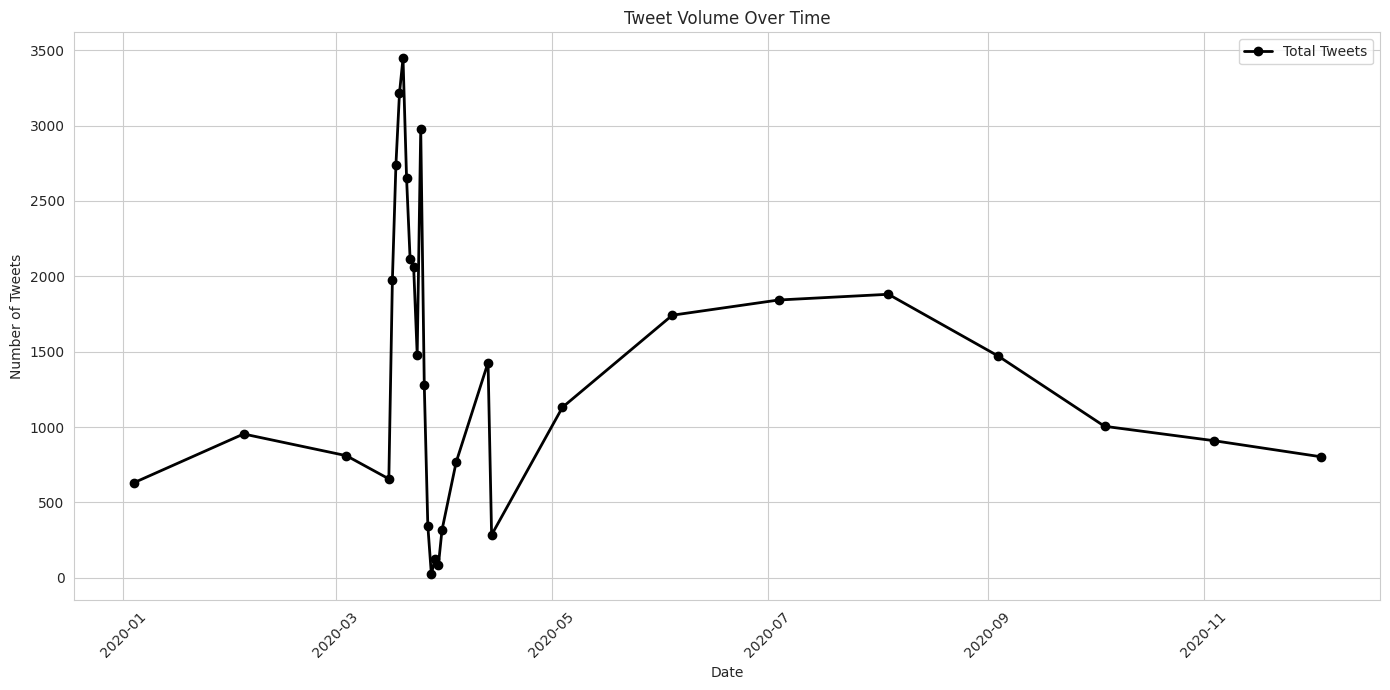

In [6]:
# Convert 'TweetAt' to datetime format
df['TweetAt'] = pd.to_datetime(df['TweetAt'], errors='coerce')

# Create a dataframe for tweet counts by date and sentiment
tweets_over_time = df.groupby([df['TweetAt'].dt.date, 'Sentiment']).size().unstack(fill_value=0)
tweets_over_time['Total'] = tweets_over_time.sum(axis=1)

# Plotting tweet volume over time
plt.figure(figsize=(14, 7))
tweets_over_time['Total'].plot(kind='line', color='black', marker='o', linewidth=2, label='Total Tweets')
plt.title('Tweet Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# Calculate the proportion of negative and extremely negative tweets for each location
location_sentiment_count['Negative Proportion'] = (location_sentiment_count['Negative'] + location_sentiment_count['Extremely Negative']) / location_sentiment_count['Total Tweets']

# Sort locations by the highest proportion of negative sentiments
negative_sentiment_locations = location_sentiment_count.sort_values(by='Negative Proportion', ascending=False)

# Filter out locations with a relatively low total number of tweets to focus on more significant data
significant_negative_sentiment_locations = negative_sentiment_locations[negative_sentiment_locations['Total Tweets'] > 50]

# Display the top 10 locations with the highest proportion of negative sentiments
significant_negative_sentiment_locations[['Negative', 'Extremely Negative', 'Total Tweets', 'Negative Proportion']].head(10)


Sentiment,Negative,Extremely Negative,Total Tweets,Negative Proportion
Location,,,,
England,17,9,55,0.472727
"Washington, D.C.",25,12,80,0.462500
"Johannesburg, South Africa",16,8,52,0.461538
Global,48,24,159,0.452830
New Delhi,18,5,51,0.450980
"New Jersey, USA",18,8,58,0.448276
"Melbourne, Australia",15,9,56,0.428571
"Texas, USA",27,15,98,0.428571
"England, United Kingdom",42,39,191,0.424084


### Text Analysis

Next, we'll conduct a basic text analysis to identify common themes or keywords across the tweets. This involves:

 - Cleaning the OriginalTweet text to remove URLs, special characters, and stopwords.
 - Extracting and visualizing the most frequent words or phrases to discern prevalent topics or concerns.

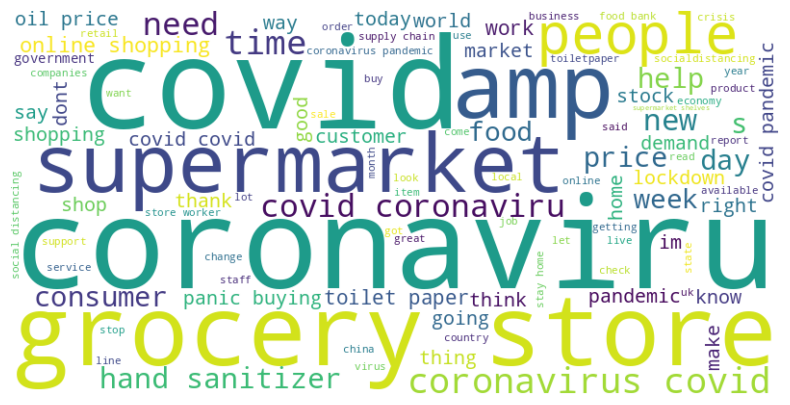

In [8]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Function to clean tweet text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Clean the OriginalTweet column
df['CleanedTweet'] = df['OriginalTweet'].apply(clean_text)

# Combine all tweets into a single text
all_tweets = ' '.join(df['CleanedTweet'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white', max_words=100).generate(all_tweets)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### EDA Summary and Initial Insights

 - Sentiment Distribution: The dataset reveals a mix of sentiments, with a slight preference towards positive reactions. This could reflect a range of public feelings from fear and concern to solidarity and hope.

 - Geographical Analysis: Tweets from London, the United States, and New York, NY, dominate the dataset, suggesting these areas were particularly vocal or affected during the early pandemic phase.

 - Temporal Trends: The volume of tweets increased significantly in the analyzed period, peaking around mid-April 2020. Sentiment fluctuations during this time likely reflect public reactions to rapidly evolving news and policies.

 - Common Themes: The text analysis underscores the multifaceted impact of the pandemic, highlighting health concerns, social and economic impacts, and the community response.

# Predictive Modelling and Machine Learning

In [10]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re

# Assuming the dataset is loaded into a DataFrame 'df' and has a column 'OriginalTweet' for text and 'Sentiment' for labels
# Preprocessing text data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text_tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    filtered_words = [word for word in text_tokens if word not in stopwords.words('english')]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    return " ".join(lemmatized_words)

# Apply preprocessing
df['ProcessedTweet'] = df['OriginalTweet'].apply(preprocess_text)

# Splitting dataset into training and test sets
X = df['ProcessedTweet']
y = df['Sentiment']

# If your 'Sentiment' labels are categorical (text), you should encode them numerically
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Proceed with TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

predictions = lr_model.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Logistic Regression Accuracy: 0.5719144800777454
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.55      1056
           1       0.68      0.55      0.61      1330
           2       0.51      0.51      0.51      2006
           3       0.62      0.67      0.64      1553
           4       0.53      0.61      0.57      2287

    accuracy                           0.57      8232
   macro avg       0.59      0.57      0.58      8232
weighted avg       0.58      0.57      0.57      8232



## Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)

predictions = rf_model.predict(X_test_tfidf)

print("Random Forest Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Random Forest Accuracy: 0.527818270165209
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.43      0.50      1056
           1       0.60      0.44      0.51      1330
           2       0.49      0.46      0.48      2006
           3       0.56      0.72      0.63      1553
           4       0.49      0.55      0.52      2287

    accuracy                           0.53      8232
   macro avg       0.55      0.52      0.53      8232
weighted avg       0.53      0.53      0.52      8232



In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
tokenizer = Tokenizer(num_words=5000)  # Adjust based on your vocabulary size
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
max_length = max([len(x) for x in X_train_seq])  # You can set a fixed length or find the max length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

# Convert labels to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))  # Assuming 5 sentiment classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_split=0.1, verbose=2)


Epoch 1/5
463/463 - 59s - loss: 1.3987 - accuracy: 0.3824 - val_loss: 1.2304 - val_accuracy: 0.4655 - 59s/epoch - 128ms/step
Epoch 2/5
463/463 - 57s - loss: 1.0074 - accuracy: 0.6059 - val_loss: 0.8687 - val_accuracy: 0.6763 - 57s/epoch - 123ms/step
Epoch 3/5
463/463 - 56s - loss: 0.7773 - accuracy: 0.7189 - val_loss: 0.7973 - val_accuracy: 0.7182 - 56s/epoch - 121ms/step
Epoch 4/5
463/463 - 57s - loss: 0.7153 - accuracy: 0.7493 - val_loss: 0.7874 - val_accuracy: 0.7224 - 57s/epoch - 123ms/step
Epoch 5/5
463/463 - 58s - loss: 0.6732 - accuracy: 0.7697 - val_loss: 0.7959 - val_accuracy: 0.7194 - 58s/epoch - 126ms/step


In [21]:
# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test_pad, y_test_cat, verbose=0)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Test Accuracy: 70.78%


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_length))  # Assuming these parameters fit your dataset
model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(5, activation='softmax'))  # Adjust the number of output units to match your number of classes

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Now, fit your model. Depending on your dataset size, consider adjusting the batch size and epochs.
history = model.fit(X_train_pad, y_train_cat, batch_size=64, epochs=5, validation_data=(X_test_pad, y_test_cat), verbose=2)


Epoch 1/5
515/515 - 145s - loss: 1.5245 - accuracy: 0.3034 - val_loss: 1.4900 - val_accuracy: 0.3209 - 145s/epoch - 282ms/step
Epoch 2/5
515/515 - 147s - loss: 1.4276 - accuracy: 0.3639 - val_loss: 1.3158 - val_accuracy: 0.4429 - 147s/epoch - 285ms/step
Epoch 3/5
515/515 - 139s - loss: 1.1689 - accuracy: 0.5189 - val_loss: 1.0971 - val_accuracy: 0.5480 - 139s/epoch - 271ms/step
Epoch 4/5
515/515 - 137s - loss: 0.9687 - accuracy: 0.6174 - val_loss: 0.9648 - val_accuracy: 0.6143 - 137s/epoch - 265ms/step
Epoch 5/5
515/515 - 146s - loss: 0.8317 - accuracy: 0.6846 - val_loss: 0.9051 - val_accuracy: 0.6594 - 146s/epoch - 284ms/step


In [23]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_pad, y_test_cat, verbose=2)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')


258/258 - 10s - loss: 0.9051 - accuracy: 0.6594 - 10s/epoch - 40ms/step
Test Loss: 0.9051, Test Accuracy: 0.6594


 - The LSTM Model showed a significant improvement over traditional machine learning models, which indicates the complex sequential nature of text data benefits from deep learning approaches.

 - The Bidirectional LSTM Model didn't outperform the unidirectional LSTM in your tests. This could be due to various factors, including the need for further hyperparameter tuning or differences in the way the bidirectional context is leveraged for sentiment analysis.

 - Exploratory data analysis (EDA) revealed valuable insights about the distribution of sentiments across different locations and over time, highlighting areas and periods with heightened negative sentiments.

 - The text analysis identified common themes and concerns among the tweets, providing a qualitative understanding of public sentiment during the early stages of the Covid-19 pandemic.